# Train a mobilenet model using Tensorflow

This notebook walks you through the process of using transfer learning to train a pre-trained `mobilenet` to recognize different breeds of cats and dogs. We will be using the [Oxford IIIT Pets dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) in this notebook.

It assumes that you have run through the `setup.ipynb` notebook to setup the workspace, datasets, and libraries that are used in this notebook. After you have run through the code in that notebook, you will have:

1. Created and started a Data Science Virtual Machine using a GPU-powered Azure VM size, e.g., NC6.
1. Downloaded and pre-processed the [Oxford IIIT Pets dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/)
1. Created an [Azure Machine Learning Workspace](https://docs.microsoft.com/en-us/azure/machine-learning/service/quickstart-get-started)
1. Created an [Azure Batch AI Cluster](https://docs.microsoft.com/en-us/azure/batch-ai/clusters)

All of these resources will be used by the code in this notebook.

## Examine the dataset

Let's look at the data in the dataset. The Oxford IIIT Pets dataset contains pictures of 37 different species of dogs and cats. All of that data lives in the ```images``` directory of this project. Let's begin by looking at the contents of this directory.

You can see that the name of each directory is the name of the breed. Within each directory is ~200 photos of that breed.

In [1]:
!ls images

Abyssinian		   Egyptian_Mau		   pug
Abyssinian_100.mat	   english_cocker_spaniel  Ragdoll
Abyssinian_101.mat	   english_setter	   Russian_Blue
Abyssinian_102.mat	   german_shorthaired	   saint_bernard
american_bulldog	   great_pyrenees	   samoyed
american_pit_bull_terrier  havanese		   scottish_terrier
basset_hound		   japanese_chin	   shiba_inu
beagle			   keeshond		   Siamese
Bengal			   leonberger		   Sphynx
Birman			   Maine_Coon		   staffordshire_bull_terrier
Bombay			   miniature_pinscher	   wheaten_terrier
boxer			   newfoundland		   yorkshire_terrier
British_Shorthair	   Persian
chihuahua		   pomeranian


Let's look at some sample images for each breed. We're using some code in the ```image_helpers``` module to render and display thumbnails of each image using ```matplotlib```.

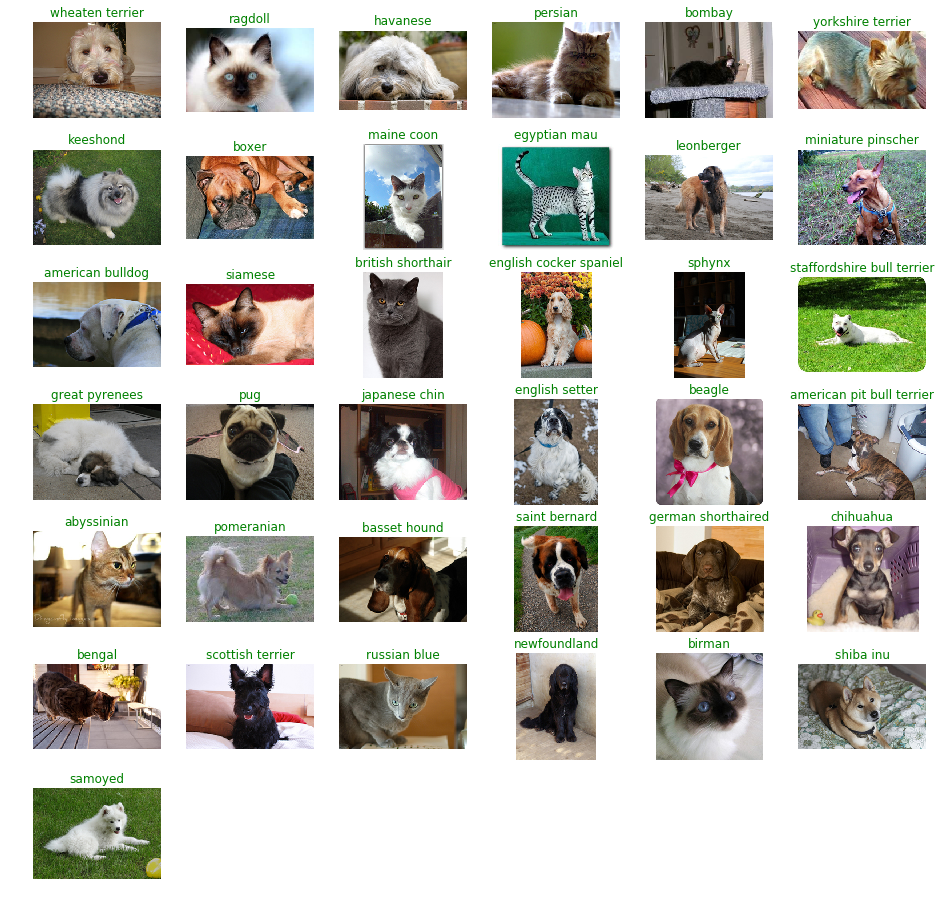

In [2]:
%matplotlib inline
from scripts.image_helpers import get_sample_images_for_each_species, plot_images_in_grid

images_data = get_sample_images_for_each_species('images')
plot_images_in_grid(images_data, 6)

## Transfer learning using mobilenet and our pet images

Next, let's use transfer learning to retrain the final layer of the `mobilenet` model. We'll be using the images that we saw earlier to train this model. We'll do the training using the GPU powered Azure VM that's attached to this notebook. If you're using an `NC6` Azure VM Size, which has an NVidia K80 GPU card in it, the transfer learning should be complete in ~25s.

In [3]:
%%time
from scripts.retrain import train 

train(architecture='mobilenet_0.50_224', 
      image_dir='images', 
      output_dir='models', 
      bottleneck_dir='bottleneck',
      model_dir='model',
      learning_rate=0.00008, 
      training_steps=500,
      use_hyperdrive=False)

tf.estimator package not installed.
INFO:tensorflow:Looking for images in 'Abyssinian'
INFO:tensorflow:Looking for images in 'Bengal'
INFO:tensorflow:Looking for images in 'Birman'
INFO:tensorflow:Looking for images in 'Bombay'
INFO:tensorflow:Looking for images in 'British_Shorthair'
INFO:tensorflow:Looking for images in 'Egyptian_Mau'
INFO:tensorflow:Looking for images in 'Maine_Coon'
INFO:tensorflow:Looking for images in 'Persian'
INFO:tensorflow:Looking for images in 'Ragdoll'
INFO:tensorflow:Looking for images in 'Russian_Blue'
INFO:tensorflow:Looking for images in 'Siamese'
INFO:tensorflow:Looking for images in 'Sphynx'
INFO:tensorflow:Looking for images in 'american_bulldog'
INFO:tensorflow:Looking for images in 'american_pit_bull_terrier'
INFO:tensorflow:Looking for images in 'basset_hound'
INFO:tensorflow:Looking for images in 'beagle'
INFO:tensorflow:Looking for images in 'boxer'
INFO:tensorflow:Looking for images in 'chihuahua'
INFO:tensorflow:Looking for images in 'english_

INFO:tensorflow:2018-11-19 03:43:11.720905: Step 100: Train accuracy = 62.0%
INFO:tensorflow:2018-11-19 03:43:11.721628: Step 100: Cross entropy = 3.037199
INFO:tensorflow:2018-11-19 03:43:11.758966: Step 100: Validation accuracy = 64.0% (N=100)
INFO:tensorflow:2018-11-19 03:43:12.128912: Step 110: Train accuracy = 72.0%
INFO:tensorflow:2018-11-19 03:43:12.129622: Step 110: Cross entropy = 2.931141
INFO:tensorflow:2018-11-19 03:43:12.167060: Step 110: Validation accuracy = 74.0% (N=100)
INFO:tensorflow:2018-11-19 03:43:12.539962: Step 120: Train accuracy = 72.0%
INFO:tensorflow:2018-11-19 03:43:12.540651: Step 120: Cross entropy = 2.884310
INFO:tensorflow:2018-11-19 03:43:12.579849: Step 120: Validation accuracy = 72.0% (N=100)
INFO:tensorflow:2018-11-19 03:43:12.950158: Step 130: Train accuracy = 70.0%
INFO:tensorflow:2018-11-19 03:43:12.950869: Step 130: Cross entropy = 2.871596
INFO:tensorflow:2018-11-19 03:43:12.988690: Step 130: Validation accuracy = 72.0% (N=100)
INFO:tensorflow:

INFO:tensorflow:2018-11-19 03:43:25.399215: Step 430: Cross entropy = 1.987633
INFO:tensorflow:2018-11-19 03:43:25.438230: Step 430: Validation accuracy = 75.0% (N=100)
INFO:tensorflow:2018-11-19 03:43:25.808480: Step 440: Train accuracy = 68.0%
INFO:tensorflow:2018-11-19 03:43:25.809224: Step 440: Cross entropy = 2.060760
INFO:tensorflow:2018-11-19 03:43:25.846799: Step 440: Validation accuracy = 79.0% (N=100)
INFO:tensorflow:2018-11-19 03:43:26.227144: Step 450: Train accuracy = 76.0%
INFO:tensorflow:2018-11-19 03:43:26.228184: Step 450: Cross entropy = 1.941079
INFO:tensorflow:2018-11-19 03:43:26.267085: Step 450: Validation accuracy = 77.0% (N=100)
INFO:tensorflow:2018-11-19 03:43:26.652382: Step 460: Train accuracy = 78.0%
INFO:tensorflow:2018-11-19 03:43:26.653176: Step 460: Cross entropy = 1.913551
INFO:tensorflow:2018-11-19 03:43:26.692637: Step 460: Validation accuracy = 79.0% (N=100)
INFO:tensorflow:2018-11-19 03:43:27.080779: Step 470: Train accuracy = 79.0%
INFO:tensorflow:

The validation accuracy of this model isn't bad, with a **test accuracy of ~79%** using a learning rate of 0.00008. This is a pretty remarkable result, since the original model published in 2012 with the Oxford IIIT Pet Dataset only [achieved 59% accuracy](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf). 

Let's see if we can further improve the accuracy of this model using the Hyperdrive feature of Azure Machine Learning to explore different learning rates by doing many runs using an Azure Batch AI cluster of GPU equipped VMs.

## Using HyperDrive to do hyper parameter optimization

Now that we have a model, the next step is to tune it for hyperdrive parameters. Hyperdrive works by copying a training script to each node in the cluster. We will be using an Azure ML `Datastore` that contains the all of the images that we used locally in this DSVM. 

Get a reference to the ```Workspace``` and the ```Experiment``` that we will be using in this demo.

In [4]:
from scripts.config import AML
from azureml.core import Workspace
from azureml.core import Experiment

ws = Workspace.get(name=AML.workspace_name, 
                   subscription_id=AML.subscription_id, 
                   resource_group=AML.resource_group) 

experiment = Experiment(ws, AML.experiment_name)

Below is the training script that will be uploaded to each node in the Azure Batch AI cluster. You can see that it accepts two command-line parameters:

* `--datastore-dir` points to the directory that contains the Oxford IIIT Pets dataset that will be mapped onto each VM in the cluster
* `--learning-rate` is the learning rate that is passed into this node to try by the Hyperdrive daemon

In [5]:
%%writefile scripts/train.py

import argparse, os
import retrain as rt

parser = argparse.ArgumentParser()
parser.add_argument('--datastore-dir', type=str, dest='datastore_dir', help='datastore dir mounting point')
parser.add_argument('--learning-rate', type=float, dest='learning_rate', default=0.01, help='learning rate')
args = parser.parse_args()

images_dir = os.path.join(args.datastore_dir, 'images')
bottleneck_dir = os.path.join(args.datastore_dir, 'bottleneck')
model_dir = os.path.join(args.datastore_dir, 'model')
output_dir = 'outputs'

rt.train(architecture='mobilenet_0.50_224', 
         image_dir=images_dir,
         output_dir=output_dir,
         bottleneck_dir=bottleneck_dir,
         model_dir=model_dir,
         learning_rate=args.learning_rate,
         training_steps=2000,
         use_hyperdrive=True)

Overwriting scripts/train.py


## Submit the job to Hyperdrive

Now let's create and submit a Hyperdrive job. There are two key things to point out here:

1. We are doing a random sampling of the learning rate, varying it from 10E-15 to 10E-3, using a logarithmic random number generator.
1. We are point to a ```Datastore``` that we have configured earlier with the Oxford IIIT training dataset passed in by reference to each node on the compute store.
1. We are passing the ```train.py``` file that we wrote out earlier to each compute node on the Batch AI cluster.
1. The training code writes out ```validation_accuracy``` to a logfile that is read by the Hyperdrive daemon to determine whether to prematurely terminate some runs if they are not within 15% of the best run to date.


Run the next cell to kick off a hyperdrive run. A full run takes ~22 minutes to complete.Run the cell after that to look at data that came from an older run.

In [6]:
from azureml.train.dnn import TensorFlow
from azureml.train.hyperdrive import RandomParameterSampling, BanditPolicy, HyperDriveRunConfig, PrimaryMetricGoal
from azureml.train.hyperdrive import loguniform, uniform

cluster = ws.compute_targets[AML.compute_name]

script_params={
    '--datastore-dir': ws.get_default_datastore().as_mount(),
}

tf_estimator = TensorFlow(source_directory='scripts',
                          compute_target=cluster,
                          entry_script='train.py',
                          script_params=script_params,
                          use_gpu=True)

ps = RandomParameterSampling(
    {
        '--learning-rate': loguniform(-15, -3)
    }
)

early_termination_policy = BanditPolicy(slack_factor = 0.15, evaluation_interval=2)

hyperdrive_run_config = HyperDriveRunConfig(estimator = tf_estimator, 
                                            hyperparameter_sampling = ps, 
                                            policy = early_termination_policy,
                                            primary_metric_name = "validation_accuracy",
                                            primary_metric_goal = PrimaryMetricGoal.MAXIMIZE,
                                            max_total_runs = 20,
                                            max_concurrent_runs = 4)

hd_run = experiment.submit(hyperdrive_run_config)
hd_run_id = hd_run.id
hd_run_id

'ConnectExperiment_1542599014424'

Let's look at the progress of the HyperDrive run using the Azure Machine Learning Jupyter widget:

In [7]:
from azureml.core import Run
from azureml.train.widgets import RunDetails

RunDetails(Run(experiment, hd_run_id)).show()

_HyperDrive(widget_settings={'childWidgetDisplay': 'popup'})

Let's look at a completed HyperDrive run so we can see the results

In [8]:
hd_run_id = 'ConnectExperiment_1542152717287'

Show progress using the AML Widget. If we are looking at `ConnectExperiment_1542152717287`, the best run from the list below is number 233, `ConnectExperiment_1542152717287_15`. It has a `final_accuracy` of 90%, which uses a test dataset that was not used for either training or validation.

In [9]:
from azureml.core import Run
from azureml.train.widgets import RunDetails

RunDetails(Run(experiment, hd_run_id)).show()

_HyperDrive(widget_settings={'childWidgetDisplay': 'popup'})

## Register the best run


In [10]:
from azureml.core import Run

best_run = Run(experiment, run_id='ConnectExperiment_1542152717287_15')
model = best_run.register_model(model_name='pet-detector', model_path='outputs')
best_run

Experiment,Id,Type,Status,Details Page,Docs Page
ConnectExperiment,ConnectExperiment_1542152717287_15,azureml.scriptrun,Completed,Link to Azure Portal,Link to Documentation


## Training complete - let's turn this into production code

Jupyter notebooks are great for experimentation and keeping track of what you have tried. Now that we have a model that we're happy with, it's time to write some code so that we can reproducibly train, optimize and deploy models in the future. We'll do the next steps using Visual Studio Code.